<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.6 Measure of statistical dependence
Often we are interested in knowing if two hydrological variables are dependant or not. In this section,
it will be described to check their statistical dependency. If two variable are statistically dependent,
it does not mean that they are physically also dependent. First we will generate two variables having
different relationship between them. Few with perfect relationship, and few with some noise added.
In the following example, we are creating six variables:

*   Perfect linear relationship ($y = a + bx$),
*   Linear relationship with some noise ($y = a+bx+\epsilon$),
*   Quadratic relationship which is monotonic ($y = x^2$),
*   Quadratic relationship with some noise ($y = x^2 + \epsilon$),
*   Quadratic relationship but this one which is not monotonic ($y = (x−5)^2$), and
*   Noise added to previous one ($y = (x−5)^2 + \epsilon$).

Below figure shows these variables. Out of the six variable, three have perfect relationship, and three
has some noise. We would expect our measure of statistical dependence to reveal this.

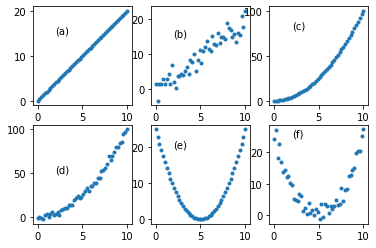

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10)
y1 = 2*x
y2 = y1 + 2*np.random.randn(50)
y3 = x**2
y4 = y3 + 2*np.random.randn(50)
y5 = (x-5)**2
y6 = y5 + 2*np.random.randn(50)

plt.subplot(2,3,1)
plt.plot(x, y1, '.')
plt.text(2,15,'(a)')

plt.subplot(2,3,2)
plt.plot(x, y2, '.')
plt.text(2,15,'(b)')

plt.subplot(2,3,3)
plt.plot(x, y3, '.')
plt.text(2,80,'(c)')

plt.subplot(2,3,4)
plt.plot(x, y4, '.')
plt.text(2,50,'(d)')

plt.subplot(2,3,5)
plt.plot(x, y5, '.')
plt.text(2,20,'(e)')

plt.subplot(2,3,6)
plt.plot(x, y6, '.')
plt.text(2,25,'(f)')
plt.show()

Unfortunately there is no measure to reveal the strength of relationship in case on non-linearty. The reason for this is that we can have any form of non linear relationship which is not possible for measure to quantity. Having said that, there are some measure which work well in some case. We will explore few of them. First begin with Pearson’s correlation coefficient, which provides the
strength of linear relationship. st.pearsonr function can be used to compute Pearson’s correlation
coefficient. This function also gives the p-value, which can be used to quantity the significance of
the relationship. We are using % operator for formatting the output. .2f tells to print the output till
second decimal places.

In [6]:
import scipy.stats as st
r1, p1 = st.pearsonr(x,y1)
r2, p2 = st.pearsonr(x,y2)
r3, p3 = st.pearsonr(x,y3)
r4, p4 = st.pearsonr(x,y4)
r5, p5 = st.pearsonr(x,y5)
r6, p6 = st.pearsonr(x,y6)

# print r's
print('%.2f %.2f %.2f %.2f %.2f %.2f'%(r1,r2,r3,r4,r5,r6))

1.00 0.95 0.97 0.97 0.00 0.01


We get 1.0 for first case, and a value slightly lesser than 1.0 for second case, because we perturbed the relationship. In third case, we get a value of 0.97, while in reality the relationship is perfect though not linear. The value is 0 in fifth case, even though the relationship is perfect. So we can
conclude that Pearson’s correlation coefficient is good only to measure the linear relationship. Now we will compute Spearman’s correlation coefficient for all these six cases using *st.spearman*.

In [7]:
rho1, p1 = st.spearmanr(x,y1)
rho2, p2 = st.spearmanr(x,y2)
rho3, p3 = st.spearmanr(x,y3)
rho4, p4 = st.spearmanr(x,y4)
rho5, p5 = st.spearmanr(x,y5)
rho6, p6 = st.spearmanr(x,y6)

# print rho's
print('%.2f %.2f %.2f %.2f %.2f %.2f'%(rho1,rho2,rho3,rho4,rho5,rho6))

1.00 0.95 1.00 0.99 0.01 0.01


Spearman’s correlation coefficient is providing the similar output like one by Spearman’s except that
it is able to recognize the relationship in third and fourth case better. In the third and fourth case,
the relationship was non-linear but monotonic. Spearman’s correlation coefficient is useful measure
when the data has monotonic behaviour. But this is also not working properly in case when the
relationship is well defined, but not monotonic. Kendall’s tau correlation coefficient is a statistics to
measure the rank correlation. Kendall’s tau can be computed using the st.kendalltau function.

In [8]:
tau1, p1 = st.kendalltau(x,y1)
tau2, p2 = st.kendalltau(x,y2)
tau3, p3 = st.kendalltau(x,y3)
tau4, p4 = st.kendalltau(x,y4)
tau5, p5 = st.kendalltau(x,y5)
tau6, p6 = st.kendalltau(x,y6)

# print tau's
print('%.2f %.2f %.2f %.2f %.2f %.2f'%(tau1,tau2,tau3,tau4,tau5,tau6))

1.00 0.81 1.00 0.95 0.01 0.00


This provides measure similar to that of Spearman’s correlation coefficient, and is unable to reveal non-monotonic relationship that we have in fifth and sixth case. However, in the case of monotonic perfect relationship (i.e. case 3), it is able to capture the strenght of relationship perfectly.